# COSC480 PROJECT - Nicole Dunn NDU31
## Importing Data

In [1]:
"""This program imports and cleans the data for a book recommendation system.
Author: Nicole Dunn NDU31
Date: 4th April 2022.
"""
import pandas as pd
from ast import literal_eval
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

books_df = pd.read_csv('https://raw.githubusercontent.com/malcolmosh/goodbooks-10k/master/books_enriched.csv', index_col=[0], converters={"genres": literal_eval})

print(books_df.head(10)) #review the data imported

   index                            authors  average_rating  best_book_id  \
0      0                ['Suzanne Collins']            4.34       2767052   
1      1  ['J.K. Rowling', 'Mary GrandPré']            4.44             3   
2      2                ['Stephenie Meyer']            3.57         41865   
3      3                     ['Harper Lee']            4.25          2657   
4      4            ['F. Scott Fitzgerald']            3.89          4671   
5      5                     ['John Green']            4.26      11870085   
6      6                 ['J.R.R. Tolkien']            4.25          5907   
7      7                  ['J.D. Salinger']            3.79          5107   
8      8                      ['Dan Brown']            3.85           960   
9      9                    ['Jane Austen']            4.24          1885   

   book_id  books_count                                        description  \
0        1          272  WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...

In [2]:
books_df.info() # Analysising potential missing data

# 57 description values and 585 original titles are missing

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      10000 non-null  int64  
 1   authors                    10000 non-null  object 
 2   average_rating             10000 non-null  float64
 3   best_book_id               10000 non-null  int64  
 4   book_id                    10000 non-null  int64  
 5   books_count                10000 non-null  int64  
 6   description                9943 non-null   object 
 7   genres                     10000 non-null  object 
 8   goodreads_book_id          10000 non-null  int64  
 9   image_url                  10000 non-null  object 
 10  isbn                       9300 non-null   object 
 11  isbn13                     9415 non-null   float64
 12  language_code              10000 non-null  object 
 13  original_publication_year  9979 non-null   floa

## Data Cleaning

In [4]:
# Reviewing book descriptions
#!pip install cchardet
#!pip install lxml
print(books_df['description'])
from bs4 import BeautifulSoup,SoupStrainer
import lxml
import requests

books_df['description'] = books_df['description'].apply(lambda x: BeautifulSoup(x).get_text() if pd.isnull(x)==False else x)

print(books_df['description'])


0       WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...
1       Harry Potter's life is miserable. His parents ...
2       About three things I was absolutely positive.\...
3       The unforgettable novel of a childhood in a sl...
4       Alternate Cover Edition ISBN: 0743273567 (ISBN...
                              ...                        
9995    A high-school girl in Harlem, Geneva Settle, i...
9996    In Karen Marie Moning’s latest installment of ...
9997    In the year 2000, computers are the new superp...
9998    A CIA agent's two-year-old child was stolen in...
9999    The First World War created the modern world. ...
Name: description, Length: 10000, dtype: object
0       WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...
1       Harry Potter's life is miserable. His parents ...
2       About three things I was absolutely positive.\...
3       The unforgettable novel of a childhood in a sl...
4       Alternate Cover Edition ISBN: 0743273567 (ISBN...
                        

In [5]:
columns = ['title', 'authors', 'genres', 'average_rating', 'description', 'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_4']
print(columns)

# Dropping columns I will not use for analysis
books_df = books_df.drop(columns=["index",'best_book_id','work_id','ratings_count',"isbn", "isbn13",
                                  'work_text_reviews_count','image_url','small_image_url', 'books_count', 'work_ratings_count', 'authors_2'])
books_df

['title', 'authors', 'genres', 'average_rating', 'description', 'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_4']


,authors,average_rating,book_id,description,genres,goodreads_book_id,language_code,original_publication_year,original_title,pages,publishDate,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,title
0,['Suzanne Collins'],4.34,1,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,"[young-adult, fiction, fantasy, science-fictio...",2767052,eng,2008.0,The Hunger Games,374.0,09/14/08,66715,127936,560092,1481305,2706317,"The Hunger Games (The Hunger Games, #1)"
1,"['J.K. Rowling', 'Mary GrandPré']",4.44,2,Harry Potter's life is miserable. His parents ...,"[fantasy, fiction, young-adult, classics]",3,eng,1997.0,Harry Potter and the Philosopher's Stone,309.0,11/01/03,75504,101676,455024,1156318,3011543,Harry Potter and the Sorcerer's Stone (Harry P...
2,['Stephenie Meyer'],3.57,3,About three things I was absolutely positive.\...,"[young-adult, fantasy, romance, fiction, paran...",41865,eng,2005.0,Twilight,501.0,09/06/06,456191,436802,793319,875073,1355439,"Twilight (Twilight, #1)"
3,['Harper Lee'],4.25,4,The unforgettable novel of a childhood in a sl...,"[classics, fiction, historical-fiction, young-...",2657,eng,1960.0,To Kill a Mockingbird,324.0,05/23/06,60427,117415,446835,1001952,1714267,To Kill a Mockingbird
4,['F. Scott Fitzgerald'],3.89,5,Alternate Cover Edition ISBN: 0743273567 (ISBN...,"[classics, fiction, historical-fiction, romance]",4671,eng,1925.0,The Great Gatsby,200.0,09/28/04,86236,197621,606158,936012,947718,The Great Gatsby
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,['[Jeffery Deaver]'],3.98,9981,"A high-school girl in Harlem, Geneva Settle, i...","[mystery, thriller, fiction, crime, suspense, ...",106312,eng,2005.0,The Twelfth Card,816.0,"('6', '7', '2005')",72,390,2874,5155,3643,"The Twelfth Card (Lincoln Rhyme, #6)"
9996,['[Karen Marie Moning]'],4.18,9982,In Karen Marie Moning’s latest installment of ...,"[fantasy, paranormal, romance, fiction, myster...",12444298,eng,2016.0,Feverborn,436.0,"('1', '19', '2016')",179,521,2308,4779,6407,"Feverborn (Fever, #8)"
9997,"['[Steve Perry', 'Tom Clancy', 'Steve Pieczeni...",3.69,9985,"In the year 2000, computers are the new superp...","[fiction, thriller, books, mystery, suspense, ...",19688,eng,2000.0,Tom Clancy's Net Force: Breaking Point,368.0,"('10', '1', '2000')",268,684,2349,2456,2068,"Breaking Point (Tom Clancy's Net Force, #4)"
9998,['[Iris Johansen]'],4.12,9987,A CIA agent's two-year-old child was stolen in...,"[mystery, fiction, thriller, suspense, crime, ...",8087038,eng,2010.0,Chasing The Night,362.0,"('10', '19', '2010')",113,331,2127,3957,4436,"Chasing The Night (Eve Duncan, #11; Catherine ..."


In [6]:
def change_lang(lang):
  if str(lang)[0:2]=='en':
    return str('eng')
  else:
    return lang

books_df['language_code'] = books_df['language_code'].apply(change_lang)
(books_df['language_code']=="eng").sum()
books_df = books_df.drop(books_df[books_df["language_code"] != "eng"].index)

books_df

,authors,average_rating,book_id,description,genres,goodreads_book_id,language_code,original_publication_year,original_title,pages,publishDate,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,title
0,['Suzanne Collins'],4.34,1,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,"[young-adult, fiction, fantasy, science-fictio...",2767052,eng,2008.0,The Hunger Games,374.0,09/14/08,66715,127936,560092,1481305,2706317,"The Hunger Games (The Hunger Games, #1)"
1,"['J.K. Rowling', 'Mary GrandPré']",4.44,2,Harry Potter's life is miserable. His parents ...,"[fantasy, fiction, young-adult, classics]",3,eng,1997.0,Harry Potter and the Philosopher's Stone,309.0,11/01/03,75504,101676,455024,1156318,3011543,Harry Potter and the Sorcerer's Stone (Harry P...
2,['Stephenie Meyer'],3.57,3,About three things I was absolutely positive.\...,"[young-adult, fantasy, romance, fiction, paran...",41865,eng,2005.0,Twilight,501.0,09/06/06,456191,436802,793319,875073,1355439,"Twilight (Twilight, #1)"
3,['Harper Lee'],4.25,4,The unforgettable novel of a childhood in a sl...,"[classics, fiction, historical-fiction, young-...",2657,eng,1960.0,To Kill a Mockingbird,324.0,05/23/06,60427,117415,446835,1001952,1714267,To Kill a Mockingbird
4,['F. Scott Fitzgerald'],3.89,5,Alternate Cover Edition ISBN: 0743273567 (ISBN...,"[classics, fiction, historical-fiction, romance]",4671,eng,1925.0,The Great Gatsby,200.0,09/28/04,86236,197621,606158,936012,947718,The Great Gatsby
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,['[Jeffery Deaver]'],3.98,9981,"A high-school girl in Harlem, Geneva Settle, i...","[mystery, thriller, fiction, crime, suspense, ...",106312,eng,2005.0,The Twelfth Card,816.0,"('6', '7', '2005')",72,390,2874,5155,3643,"The Twelfth Card (Lincoln Rhyme, #6)"
9996,['[Karen Marie Moning]'],4.18,9982,In Karen Marie Moning’s latest installment of ...,"[fantasy, paranormal, romance, fiction, myster...",12444298,eng,2016.0,Feverborn,436.0,"('1', '19', '2016')",179,521,2308,4779,6407,"Feverborn (Fever, #8)"
9997,"['[Steve Perry', 'Tom Clancy', 'Steve Pieczeni...",3.69,9985,"In the year 2000, computers are the new superp...","[fiction, thriller, books, mystery, suspense, ...",19688,eng,2000.0,Tom Clancy's Net Force: Breaking Point,368.0,"('10', '1', '2000')",268,684,2349,2456,2068,"Breaking Point (Tom Clancy's Net Force, #4)"
9998,['[Iris Johansen]'],4.12,9987,A CIA agent's two-year-old child was stolen in...,"[mystery, fiction, thriller, suspense, crime, ...",8087038,eng,2010.0,Chasing The Night,362.0,"('10', '19', '2010')",113,331,2127,3957,4436,"Chasing The Night (Eve Duncan, #11; Catherine ..."


In [7]:
#check for duplicates 
#no duplicates by book_id
books_df['goodreads_book_id'].duplicated().sum()

# there are 35 duplicates by title
books_df['title'].duplicated().sum()
duplicates = books_df.loc[(books_df['title'].duplicated(keep=False))==True,:].sort_values('title')
duplicates.head(5)

# let's drop them to be on the safe side
books_df = books_df.drop_duplicates(subset = ['title'])

books_df

,authors,average_rating,book_id,description,genres,goodreads_book_id,language_code,original_publication_year,original_title,pages,publishDate,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,title
0,['Suzanne Collins'],4.34,1,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,"[young-adult, fiction, fantasy, science-fictio...",2767052,eng,2008.0,The Hunger Games,374.0,09/14/08,66715,127936,560092,1481305,2706317,"The Hunger Games (The Hunger Games, #1)"
1,"['J.K. Rowling', 'Mary GrandPré']",4.44,2,Harry Potter's life is miserable. His parents ...,"[fantasy, fiction, young-adult, classics]",3,eng,1997.0,Harry Potter and the Philosopher's Stone,309.0,11/01/03,75504,101676,455024,1156318,3011543,Harry Potter and the Sorcerer's Stone (Harry P...
2,['Stephenie Meyer'],3.57,3,About three things I was absolutely positive.\...,"[young-adult, fantasy, romance, fiction, paran...",41865,eng,2005.0,Twilight,501.0,09/06/06,456191,436802,793319,875073,1355439,"Twilight (Twilight, #1)"
3,['Harper Lee'],4.25,4,The unforgettable novel of a childhood in a sl...,"[classics, fiction, historical-fiction, young-...",2657,eng,1960.0,To Kill a Mockingbird,324.0,05/23/06,60427,117415,446835,1001952,1714267,To Kill a Mockingbird
4,['F. Scott Fitzgerald'],3.89,5,Alternate Cover Edition ISBN: 0743273567 (ISBN...,"[classics, fiction, historical-fiction, romance]",4671,eng,1925.0,The Great Gatsby,200.0,09/28/04,86236,197621,606158,936012,947718,The Great Gatsby
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,['[Jeffery Deaver]'],3.98,9981,"A high-school girl in Harlem, Geneva Settle, i...","[mystery, thriller, fiction, crime, suspense, ...",106312,eng,2005.0,The Twelfth Card,816.0,"('6', '7', '2005')",72,390,2874,5155,3643,"The Twelfth Card (Lincoln Rhyme, #6)"
9996,['[Karen Marie Moning]'],4.18,9982,In Karen Marie Moning’s latest installment of ...,"[fantasy, paranormal, romance, fiction, myster...",12444298,eng,2016.0,Feverborn,436.0,"('1', '19', '2016')",179,521,2308,4779,6407,"Feverborn (Fever, #8)"
9997,"['[Steve Perry', 'Tom Clancy', 'Steve Pieczeni...",3.69,9985,"In the year 2000, computers are the new superp...","[fiction, thriller, books, mystery, suspense, ...",19688,eng,2000.0,Tom Clancy's Net Force: Breaking Point,368.0,"('10', '1', '2000')",268,684,2349,2456,2068,"Breaking Point (Tom Clancy's Net Force, #4)"
9998,['[Iris Johansen]'],4.12,9987,A CIA agent's two-year-old child was stolen in...,"[mystery, fiction, thriller, suspense, crime, ...",8087038,eng,2010.0,Chasing The Night,362.0,"('10', '19', '2010')",113,331,2127,3957,4436,"Chasing The Night (Eve Duncan, #11; Catherine ..."


In [26]:
def combine_features(data):
    """Function that combines important columns"""
    features = []
    for i in range(data.shape[0]):
        features.append(str(data['title'][i])  + ' '  + str(data['description'][i]))
    return features

books_df.reset_index(inplace=True,drop=True)   
books_df.loc[:,'combined_features'] = combine_features(books_df)


books_df


,authors,average_rating,book_id,description,genres,goodreads_book_id,language_code,original_publication_year,original_title,pages,publishDate,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,title,combined_features
0,['Suzanne Collins'],4.34,1,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,"[young-adult, fiction, fantasy, science-fictio...",2767052,eng,2008.0,The Hunger Games,374.0,09/14/08,66715,127936,560092,1481305,2706317,"The Hunger Games (The Hunger Games, #1)","The Hunger Games (The Hunger Games, #1) WINNIN..."
1,"['J.K. Rowling', 'Mary GrandPré']",4.44,2,Harry Potter's life is miserable. His parents ...,"[fantasy, fiction, young-adult, classics]",3,eng,1997.0,Harry Potter and the Philosopher's Stone,309.0,11/01/03,75504,101676,455024,1156318,3011543,Harry Potter and the Sorcerer's Stone (Harry P...,Harry Potter and the Sorcerer's Stone (Harry P...
2,['Stephenie Meyer'],3.57,3,About three things I was absolutely positive.\...,"[young-adult, fantasy, romance, fiction, paran...",41865,eng,2005.0,Twilight,501.0,09/06/06,456191,436802,793319,875073,1355439,"Twilight (Twilight, #1)","Twilight (Twilight, #1) About three things I w..."
3,['Harper Lee'],4.25,4,The unforgettable novel of a childhood in a sl...,"[classics, fiction, historical-fiction, young-...",2657,eng,1960.0,To Kill a Mockingbird,324.0,05/23/06,60427,117415,446835,1001952,1714267,To Kill a Mockingbird,To Kill a Mockingbird The unforgettable novel ...
4,['F. Scott Fitzgerald'],3.89,5,Alternate Cover Edition ISBN: 0743273567 (ISBN...,"[classics, fiction, historical-fiction, romance]",4671,eng,1925.0,The Great Gatsby,200.0,09/28/04,86236,197621,606158,936012,947718,The Great Gatsby,The Great Gatsby Alternate Cover Edition ISBN:...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9640,['[Jeffery Deaver]'],3.98,9981,"A high-school girl in Harlem, Geneva Settle, i...","[mystery, thriller, fiction, crime, suspense, ...",106312,eng,2005.0,The Twelfth Card,816.0,"('6', '7', '2005')",72,390,2874,5155,3643,"The Twelfth Card (Lincoln Rhyme, #6)","The Twelfth Card (Lincoln Rhyme, #6) A high-sc..."
9641,['[Karen Marie Moning]'],4.18,9982,In Karen Marie Moning’s latest installment of ...,"[fantasy, paranormal, romance, fiction, myster...",12444298,eng,2016.0,Feverborn,436.0,"('1', '19', '2016')",179,521,2308,4779,6407,"Feverborn (Fever, #8)","Feverborn (Fever, #8) In Karen Marie Moning’s ..."
9642,"['[Steve Perry', 'Tom Clancy', 'Steve Pieczeni...",3.69,9985,"In the year 2000, computers are the new superp...","[fiction, thriller, books, mystery, suspense, ...",19688,eng,2000.0,Tom Clancy's Net Force: Breaking Point,368.0,"('10', '1', '2000')",268,684,2349,2456,2068,"Breaking Point (Tom Clancy's Net Force, #4)","Breaking Point (Tom Clancy's Net Force, #4) In..."
9643,['[Iris Johansen]'],4.12,9987,A CIA agent's two-year-old child was stolen in...,"[mystery, fiction, thriller, suspense, crime, ...",8087038,eng,2010.0,Chasing The Night,362.0,"('10', '19', '2010')",113,331,2127,3957,4436,"Chasing The Night (Eve Duncan, #11; Catherine ...","Chasing The Night (Eve Duncan, #11; Catherine ..."


In [25]:
#Converting the text from the combined features column to a matrix of word counts

cm = CountVectorizer().fit_transform(books_df['combined_features'])

#Getting the cosine similarity matrix from the count matrix, this comapres each book in the dataset to every other book within it

cs = cosine_similarity(cm)

print(cs)

[[1.         0.54633074 0.21227078 ... 0.49138906 0.48060722 0.65768427]
 [0.54633074 1.         0.24043473 ... 0.49433716 0.38632985 0.65047568]
 [0.21227078 0.24043473 1.         ... 0.09181562 0.21079803 0.24401781]
 ...
 [0.49138906 0.49433716 0.09181562 ... 1.         0.29387318 0.6050298 ]
 [0.48060722 0.38632985 0.21079803 ... 0.29387318 1.         0.42093284]
 [0.65768427 0.65047568 0.24401781 ... 0.6050298  0.42093284 1.        ]]


In [14]:
Title = books_df['title'][2]


book_id = books_df[books_df.title == Title]['book_id'].values[0]
book_id

#This creates a list of tuples with the book id and similarity scores to the chosen title
similarity_scores = list(enumerate(cs[book_id-1]))
print(similarity_scores)

[(0, 0.21227077935637112), (1, 0.24043472671155014), (2, 0.9999999999999997), (3, 0.3849983958433593), (4, 0.15871183003658032), (5, 0.25881511709080524), (6, 0.2897922161411175), (7, 0.32954577682903385), (8, 0.1508542740671401), (9, 0.24100749907751173), (10, 0.2286078458149863), (11, 0.22179421264096172), (12, 0.2705607522854217), (13, 0.21224998378646015), (14, 0.23081992025804288), (15, 0.2325736847268527), (16, 0.12098807094023802), (17, 0.18295551380556924), (18, 0.2443977301074942), (19, 0.23370945866978507), (20, 0.2687578019364719), (21, 0.19635990917279492), (22, 0.18395670472343612), (23, 0.26313709275631236), (24, 0.1346355309539964), (25, 0.293627329786677), (26, 0.343790851628475), (27, 0.24000597998941373), (28, 0.28905159224751925), (29, 0.27872598020817996), (30, 0.2330230343434553), (31, 0.02875986542715254), (32, 0.13103152966192225), (33, 0.3814488470245876), (34, 0.27251849770113407), (35, 0.36378448339829017), (36, 0.24560564829728074), (37, 0.37346854725143724),

In [15]:
#Sorting the above list in descending order, removing the original title

sort_scores = sorted(similarity_scores, key=lambda x:x[1],reverse= True)
sort_scores = sort_scores[1:]
print(sort_scores)

[(1525, 0.501664576401953), (9506, 0.4668845648229315), (9013, 0.45911905526363483), (455, 0.44572854925608224), (42, 0.44458383744837904), (9507, 0.4412549978685835), (6408, 0.4349436275119284), (9119, 0.42795158585230963), (6547, 0.4254666823738599), (3685, 0.41907113352080266), (49, 0.4139208658949382), (3600, 0.4137048397700775), (1875, 0.4109408063112023), (5650, 0.4079015827236455), (9199, 0.40661245528647955), (9422, 0.40639044650319134), (3098, 0.4062332666006552), (9421, 0.4057269514541481), (6457, 0.40494258188495813), (5481, 0.4036492491030278), (9073, 0.4009166360410914), (5682, 0.400775583250905), (6880, 0.4005477528056965), (7855, 0.3991752264872283), (5250, 0.3984406768805304), (3137, 0.3979337312672636), (4522, 0.39660618625266847), (3708, 0.39616200519950073), (1210, 0.3958869136548284), (2876, 0.39533412737590334), (5498, 0.3950493842597417), (304, 0.3945679442122626), (4187, 0.39409193303885376), (196, 0.39376587145814657), (2664, 0.3903396140932991), (2853, 0.389747

In [16]:
#Printing the top 5 recommended books

def processString(text):
    """Function to clean up text"""
    specialChars = "[]!#$%^&*()'" 
    for specialChar in specialChars:
        text = text.replace(specialChar, '')
    return text

def recommendations(Title, data, scoring):
    i = 0
    print(f'Top 5 Recommendations for {Title}:')
    while i < 5:
      item = scoring[i]
      book_title = data[data.book_id == item[0]]['title'].values[0]
      new = data[data.book_id == item[0]]['authors'].values[0]
      test = processString(new)
      print(f"{i+1} {book_title} by {test}")
      i += 1

            
            
recommendations(Title, books_df, sort_scores)

Top 5 Recommendations for Twilight (Twilight, #1):
1 Crossroads of Twilight (Wheel of Time, #10) by Robert Jordan
2 The Children's Book by A.S. Byatt
3 Hourglass (Hourglass, #1) by Myra McEntire
4 Something Blue (Darcy & Rachel, #2) by Emily Giffin
5 Little Women (Little Women, #1) by Louisa May Alcott


In [161]:
"""This program imports and cleans the data for a book recommendation system.
Author: Nicole Dunn NDU31
Date: 4th April 2022.
"""
import pandas as pd
from bs4 import BeautifulSoup,SoupStrainer
import lxml
import requests
from ast import literal_eval
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

def data_cleaning():
    """Imports and cleans the dataset"""
    books_df = pd.read_csv('https://raw.githubusercontent.com/malcolmosh/goodbooks-10k/master/books_enriched.csv', index_col=[0], converters={"genres": literal_eval})
    books_df['description'] = books_df['description'].apply(lambda x: BeautifulSoup(x, features="lxml").get_text() if pd.isnull(x)==False else x)
    books_df = books_df.drop(columns=["index",'best_book_id','work_id','ratings_count',"isbn", "isbn13",
                                      'work_text_reviews_count','image_url','small_image_url', 'books_count', 'work_ratings_count', 'authors_2'])
    books_df['language_code'] = books_df['language_code'].apply(change_lang)
    (books_df['language_code']=="eng").sum()
    books_df = books_df.drop(books_df[books_df["language_code"] != "eng"].index)
    duplicates = books_df.loc[(books_df['title'].duplicated(keep=False))==True,:].sort_values('title')
    books_df = books_df.drop_duplicates(subset = ['title'])
    return books_df
    
def change_lang(lang):
    if str(lang)[0:2]=='en':
        return str('eng')
    else:
        return lang

def user_input(data_set):
    """Function to get title from the user"""
    prompt = "What book title are you wanting a recommendation from? "
    b_title = input(prompt)
    while b_title not in list(data_set['original_title']):
        print("Title not in list, please try again. ")
        b_title = input(prompt)
    return data_set[data_set['original_title'] == b_title]['book_id'].values[0]



def combine_features(data):
    """Function that combines important columns"""
    features = []
    for i in range(data.shape[0]):
        features.append(str(data['title'][i]) + ' ' + str(data['description'][i]))
    return features

def sim_mathematics(final_set, book_title_id):
    """Function that returns the cosine similarity index with book id key"""
    cm = CountVectorizer().fit_transform(final_set['combined_features'])
    cs = cosine_similarity(cm)
    book_title = final_set['title'][book_title_id - 1]
    book_id = final_set[final_set.title == book_title]['book_id'].values[0]
    similarity_scores = list(enumerate(cs[book_id-1]))
    sort_scores = sorted(similarity_scores, key=lambda x:x[1],reverse= True)    
    return sort_scores[1:], book_title

def processString(text):
    """Function to clean up text"""
    specialChars = "[]!#$%^&*()'" 
    for specialChar in specialChars:
        text = text.replace(specialChar, '')
    return text

def recommendations(Title, data, scoring):
    i = 0
    print(f'Top 5 Recommendations for {Title}:')
    for item in scoring:
        book_title = data[data.book_id == item[0]]['title'].values[0]
        new = data[data.book_id == item[0]]['authors'].values[0]
        book_author = processString(new)
        print(f"{i+1} {book_title} by {book_author}")
        i += 1
        if i > 4:
            break

def main():
    """Main Program"""
    data_set = data_cleaning()
    book_title_id = user_input(data_set)
    data_set.reset_index(inplace=True,drop=True)   
    data_set['combined_features'] = combine_features(data_set) 
    similarity, book_title = sim_mathematics(data_set, book_title_id)
    recommendations(book_title, data_set, similarity)


main()

What book title are you wanting a recommendation from? Hunger Games
Title not in list, please try again. 
What book title are you wanting a recommendation from? The Hunger Games
Top 5 Recommendations for The Hunger Games (The Hunger Games, #1):
1 The Battle for Skandia (Ranger's Apprentice, #4) by John Flanagan
2 Shadow's Edge (Night Angel, #2) by Brent Weeks
3 Chosen (House of Night, #3) by P.C. Cast, Kristin Cast
4 Burn for Me (Hidden Legacy, #1) by Ilona Andrews
5 Chasing Darkness (Elvis Cole, #12) by Robert Crais


Data Exploration

In [3]:
# Reviewing book genres
print(books_df['genres'])
all_genres = set()
for genres in books_df['genres']:
    for genre in genres:
        all_genres.add(genre)
print(all_genres)

0       [young-adult, fiction, fantasy, science-fictio...
1               [fantasy, fiction, young-adult, classics]
2       [young-adult, fantasy, romance, fiction, paran...
3       [classics, fiction, historical-fiction, young-...
4        [classics, fiction, historical-fiction, romance]
                              ...                        
9995    [mystery, thriller, fiction, crime, suspense, ...
9996    [fantasy, paranormal, romance, fiction, myster...
9997    [fiction, thriller, books, mystery, suspense, ...
9998    [mystery, fiction, thriller, suspense, crime, ...
9999            [history, nonfiction, historical-fiction]
Name: genres, Length: 10000, dtype: object
{'history', 'romance', 'music', 'crime', 'philosophy', 'suspense', 'science-fiction', 'science', 'nonfiction', 'humor-and-comedy', 'contemporary', 'classics', 'mystery', 'religion', 'psychology', 'books', 'thriller', 'gay-and-lesbian', 'biography', 'paranormal', 'christian', 'manga', 'spirituality', 'historical-fictio

In [8]:
rating_sum = books_df[['ratings_1','ratings_2','ratings_3','ratings_4','ratings_5']].sum().reset_index()
print(rating_sum)

       index          0
0  ratings_1   13211593
1  ratings_2   30518046
2  ratings_3  112620837
3  ratings_4  196256251
4  ratings_5  234299759


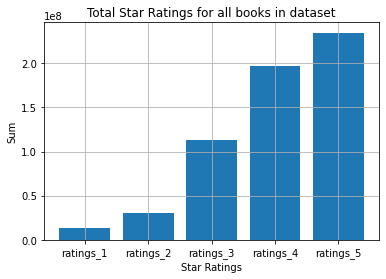

In [9]:
import matplotlib.pyplot as plt 


axes = plt.axes()
axes.bar(rating_sum.iloc[:,0], rating_sum.iloc[:,1])
axes.set_title("Total Star Ratings for all books in dataset")
axes.set_xlabel("Star Ratings")
axes.set_ylabel("Sum")
axes.grid(True)
plt.show()

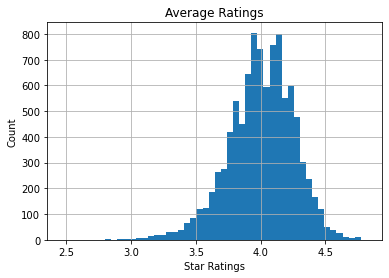

In [10]:
axes = plt.axes()
axes.hist(books_df['average_rating'], 50)
axes.set_title("Average Ratings")
axes.set_xlabel("Star Ratings")
axes.set_ylabel("Count")
axes.grid(True)
plt.show()

In [11]:
#best reviewed books

#get top 20 books
books_df_pop = books_df.sort_values(['average_rating'], ascending = False).iloc[0:20,]

#draw table
books_df_pop[["title","authors","average_rating"]].reset_index(drop=True)

,title,authors,average_rating
0,The Complete Calvin and Hobbes,['Bill Watterson'],4.82
1,"Words of Radiance (The Stormlight Archive, #2)",['Brandon Sanderson'],4.77
2,"Harry Potter Boxed Set, Books 1-5 (Harry Potte...","['J.K. Rowling', 'Mary GrandPré']",4.77
3,ESV Study Bible,"['Anonymous', 'Lane T. Dennis', 'Wayne A. Grud...",4.76
4,Mark of the Lion Trilogy,['Francine Rivers'],4.76
5,It's a Magical World: A Calvin and Hobbes Coll...,['Bill Watterson'],4.75
6,There's Treasure Everywhere: A Calvin and Hobb...,['Bill Watterson'],4.74
7,"Harry Potter Boxset (Harry Potter, #1-7)",['J.K. Rowling'],4.74
8,"Harry Potter Collection (Harry Potter, #1-6)",['J.K. Rowling'],4.73
9,The Indispensable Calvin and Hobbes,['Bill Watterson'],4.73
